INTRODUCTION

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


DATA

In [40]:
df = pd.read_csv ('all_data.csv')
print(df.head())
print(len(df))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
96


In [41]:
columns = df.columns
print(columns)
data_types = df.dtypes
print(data_types)
print(df.Country.unique())
print(df.Year.unique())

# Variables Numericas: GDP (Continua), Life expectancy (continua), Year (temporal)
# Variables Categoricas: Country

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [42]:
# Calculemos la media de edad y la media de GDP segun pais.
def GDP_mean(data):
    countries = data.Country.unique()
    mean_country = []
    for c in countries:
        datac = data[data['Country'] == c ]
        PIB = datac['GDP'].mean()
        mean_country.append(PIB)
    return mean_country

print(GDP_mean(df))

def life_mean(data):
    countries = data.Country.unique()
    mean_country = []
    for c in countries:
        datac = data[data['Country'] == c ]
        life = datac['Life expectancy at birth (years)'].mean()
        mean_country.append(life)
    return mean_country

print(life_mean(df))

#Obtengamos la información estadistica de cada uno de los paises

def info (data):
    countries = data.Country.unique()
    GDp_info= []
    life_info=[]
    for c in countries:
        country = data[data['Country'] == c]
        GDp = country.GDP.describe()
        life = country['Life expectancy at birth (years)'].describe()
        GDp_info.append(GDp)
        life_info.append(life)
    return GDp_info, life_info

print(info(df))


[169788845015.3125, 4957713750000.0, 3094775625000.0, 976650625000.0, 14075000000000.0, 9062579595.0625]
[78.94374999999998, 74.26249999999999, 79.65625, 75.71875, 78.0625, 50.09375000000001]
([count    1.600000e+01
mean     1.697888e+11
std      7.687884e+10
min      6.973681e+10
25%      9.387303e+10
50%      1.729975e+11
75%      2.449515e+11
max      2.783840e+11
Name: GDP, dtype: float64, count    1.600000e+01
mean     4.957714e+12
std      3.501096e+12
min      1.211350e+12
25%      1.881585e+12
50%      4.075195e+12
75%      7.819550e+12
max      1.106470e+13
Name: GDP, dtype: float64, count    1.600000e+01
mean     3.094776e+12
std      6.674862e+11
min      1.949950e+12
25%      2.740870e+12
50%      3.396350e+12
75%      3.596078e+12
max      3.890610e+12
Name: GDP, dtype: float64, count    1.600000e+01
mean     9.766506e+11
std      2.095716e+11
min      6.836480e+11
25%      7.630910e+11
50%      1.004376e+12
75%      1.156992e+12
max      1.298460e+12
Name: GDP, dtype: flo

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Life expectancy at birth (years)'>

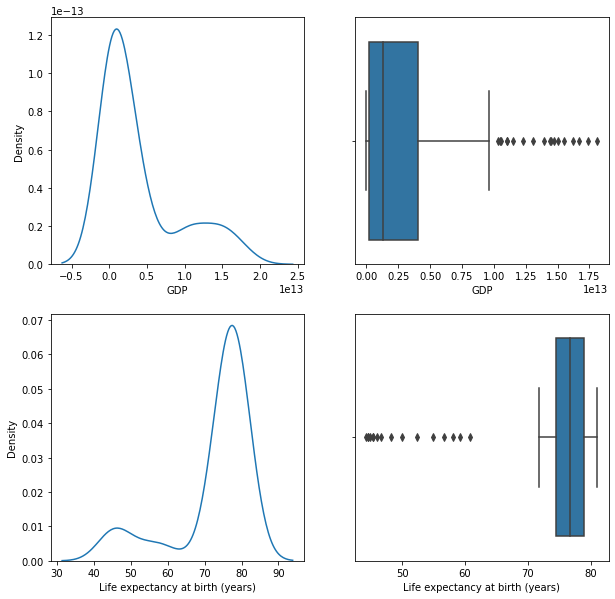

In [43]:
# Representar graficamente las variables numericas continuasa traves de KDE y Boxplots, para ver como se distribuyen los datos

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(df.GDP)
plt.subplot(2,2,2)
sns.boxplot(df.GDP)
plt.subplot(2,2,3)
sns.kdeplot(df['Life expectancy at birth (years)'])
plt.subplot(2,2,4)
sns.boxplot(df['Life expectancy at birth (years)'])

### Como podemos ver en los graficos, con respecto al GDP existen dos muestras diferenciadas, una donde se concentra la mayor parte de la poblacion
### Entre 0 y 0.5 billones de dolares y otro en el que se concentra una menor cantidad de muestra entre 1 y 1,75 billones

### En el caso de la esperanza de vida vemos como hay una poblacion pequeña con una esperanza de vida menor, y una gran mayoria con una esperanza de vida mayor



LIMPIEZA DATASET

<AxesSubplot:>

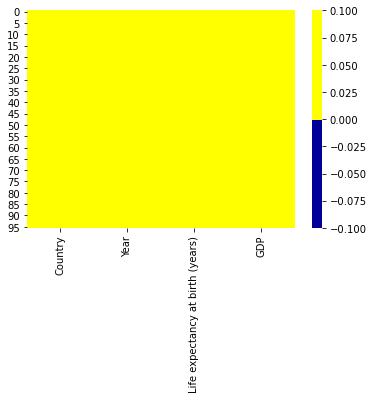

In [44]:
#Cuantos valores ausentes o Missing Data hay en el dataset?
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Life expectancy at birth (years)'>

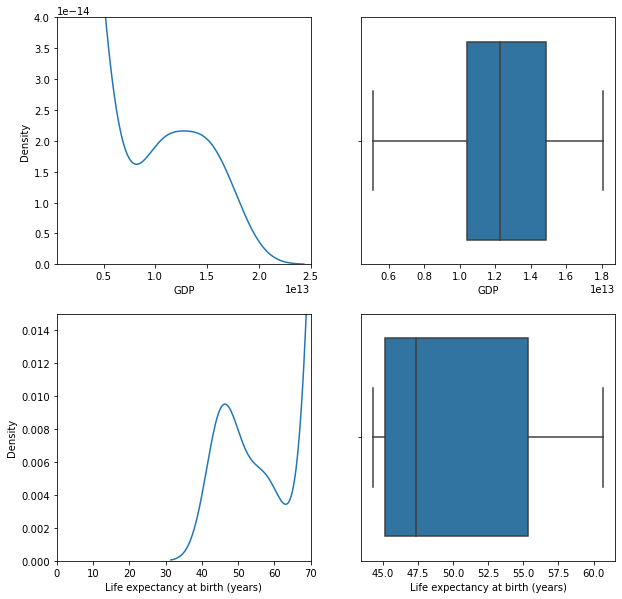

In [45]:
# Outliers. En este dataframe hay dos variables con claros outliers. Estos dan bastante información y por tanto no se requiere
# (...) normalizarlos o incluso eliminarlos. Se analizan indpendientemente. Analicemos primero el GDP.

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(df.GDP)
plt.axis([500000000000, 25000000000000, 0.000000000000, 0.00000000000004])

GDP_outliers = df[df['GDP'] > 5000000000000]

plt.subplot(2,2,2)
sns.boxplot(GDP_outliers.GDP)

plt.subplot(2,2,3)
sns.kdeplot(df['Life expectancy at birth (years)'])
plt.axis([0, 70, 0.00, 0.015])

GDP_outliers = df[df['Life expectancy at birth (years)'] < 70 ]

plt.subplot(2,2,4)
sns.boxplot(GDP_outliers['Life expectancy at birth (years)'])

In [56]:
#Unnecesary data
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()
    else:
        print(col, 'There is no repetead Data in this variable')

# Duplicated Values

Duplicated_data = df.duplicated()

for data in Duplicated_data:
    if data == True:
        print (data)
    else:
        pass

#Inconsistent Data

df['Country_lower'] = df.Country.str.lower()
df['Country_lower'] = df.Country_lower.replace('united states of america', 'USA')
print(df.Country_lower.value_counts())

#Formats



Country There is no repetead Data in this variable
Year: 100.00000%
1970    96
Name: Year, dtype: int64

Life expectancy at birth (years) There is no repetead Data in this variable
GDP There is no repetead Data in this variable
Country_lower There is no repetead Data in this variable
Timestamp: 100.00000%
1970-01-01 00:00:00.000001970    96
Name: Timestamp, dtype: int64

year: 100.00000%
1970    96
Name: year, dtype: int64

USA         16
mexico      16
chile       16
china       16
germany     16
zimbabwe    16
Name: Country_lower, dtype: int64
int64
